In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

housing = pd.DataFrame(pd.read_csv("Housing.csv"))

examplesList = list(zip((housing.area).astype(int) / 1000, (housing.price).astype(int) / 1000000))

In [12]:
print(examplesList)

[(7.42, 13.3), (8.96, 12.25), (9.96, 12.25), (7.5, 12.215), (7.42, 11.41), (7.5, 10.85), (8.58, 10.15), (16.2, 10.15), (8.1, 9.87), (5.75, 9.8), (13.2, 9.8), (6.0, 9.681), (6.55, 9.31), (3.5, 9.24), (7.8, 9.24), (6.0, 9.1), (6.6, 9.1), (8.5, 8.96), (4.6, 8.89), (6.42, 8.855), (4.32, 8.75), (7.155, 8.68), (8.05, 8.645), (4.56, 8.645), (8.8, 8.575), (6.54, 8.54), (6.0, 8.463), (8.875, 8.4), (7.95, 8.4), (5.5, 8.4), (7.475, 8.4), (7.0, 8.4), (4.88, 8.295), (5.96, 8.19), (6.84, 8.12), (7.0, 8.08094), (7.482, 8.043), (9.0, 7.98), (6.0, 7.9625), (6.0, 7.91), (6.55, 7.875), (6.36, 7.84), (6.48, 7.7), (6.0, 7.7), (6.0, 7.56), (6.0, 7.56), (6.0, 7.525), (6.6, 7.49), (4.3, 7.455), (7.44, 7.42), (7.44, 7.42), (6.325, 7.42), (6.0, 7.35), (5.15, 7.35), (6.0, 7.35), (6.0, 7.35), (11.44, 7.343), (9.0, 7.245), (7.68, 7.21), (6.0, 7.21), (6.0, 7.14), (8.88, 7.07), (6.24, 7.07), (6.36, 7.035), (11.175, 7.0), (8.88, 6.93), (13.2, 6.93), (7.7, 6.895), (6.0, 6.86), (12.09, 6.79), (4.0, 6.79), (6.0, 6.755),

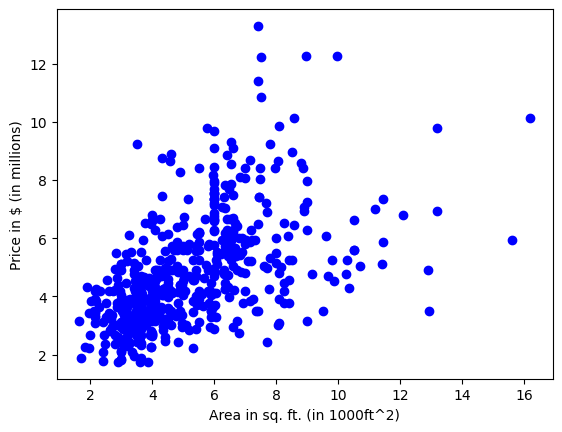

In [13]:
# Displaying the data we have
plt.scatter(*zip(*examplesList), color="blue")
plt.xlabel("Area in sq. ft. (in 1000ft^2)")
plt.ylabel("Price in $ (in millions)")
plt.show()

In [14]:
# Initialize parameters. Using -5 for plotting purposes
parameters = {"theta0": -5, "theta1": -5}

# Initialize the list to keep track of past parameter values to plot later
pastParameters = []

In [15]:
# Define the model
def model(parameters, x):
    return parameters["theta0"] + parameters["theta1"] * x

def derivative0(parameters, x, y):
    return y - model(parameters, x)

def derivative1(parameters, x, y):
    return (y - model(parameters, x)) * x


# Define the loss, output loss is normalized by number of data points
def loss(parameters, examplesList):
    loss = 0

    # Find the loss
    for x, y in examplesList:
        loss += (y - model(parameters, x)) ** 2

    return loss / len(examplesList)


def lossPlot(theta0, theta1):
    sum = 0
    for x, y in examplesList:
        sum += 0.5 * (y - x * theta1 - theta0) ** 2

    return sum / len(examplesList)

    

In [16]:
# Define hyperparameters
L0 = 0.01
L1 = 0.01
epochs = 1000

random.shuffle(examplesList)


def train(parameters, examplesList):
    for i in range (epochs):
        for x, y in examplesList:
            parameters["theta0"] = parameters["theta0"] + L0 * derivative0(parameters, x, y) / (2 ** (epochs // 250 ))
            parameters["theta1"] = parameters["theta1"] + L1 * derivative1(parameters, x, y) / (2 ** (epochs // 250 ))
        
        if i % 100 == 0:
            print(loss(parameters, examplesList))

        if i % 10 == 0:
            pastParameters.append((parameters["theta0"], parameters["theta1"]))

train(parameters, examplesList)


3.2379420114054636
2.5334918899888597
2.5333916581208977
2.533391196386918
2.5333911934127804
2.533391193393575
2.5333911933934505
2.533391193393448
2.533391193393448
2.533391193393448


In [17]:
print(parameters)

{'theta0': 2.4013933269789995, 'theta1': 0.4974005170325714}


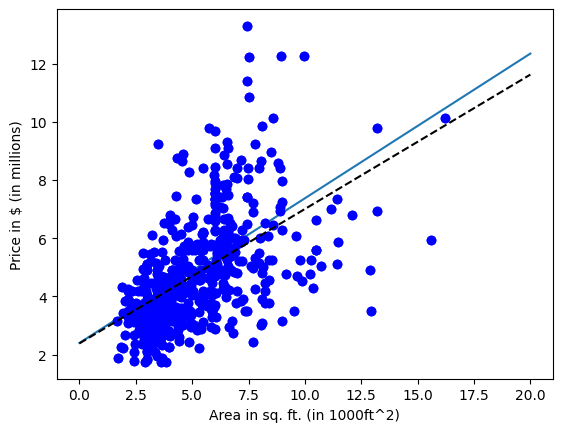

In [18]:
plt.scatter(*zip(*examplesList), color="blue")
plt.xlabel("Area in sq. ft. (in 1000ft^2)")
plt.ylabel("Price in $ (in millions)")

x = np.linspace(0, 20, 4)
y = parameters["theta0"] + x * parameters["theta1"]
plt.plot(x,y)

dataX = [entry[0] for entry in examplesList]
dataY = [entry[1] for entry in examplesList]

coef = np.polyfit(dataX, dataY, 1)
actualRegression = np.poly1d(coef)

plt.plot(dataX, dataY, 'bo', x, actualRegression(x), '--k')

plt.show()

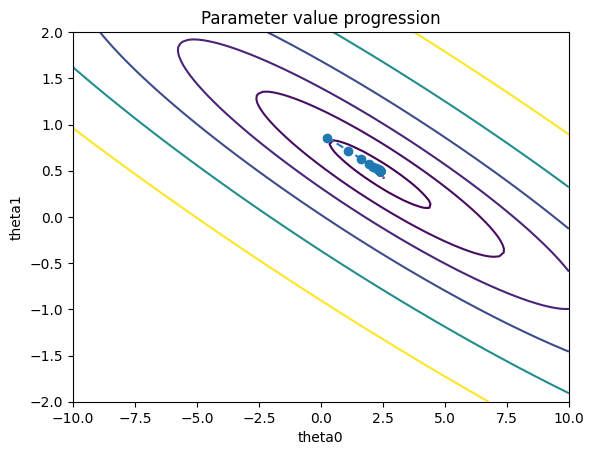

In [19]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = lossPlot(X, Y)

plt.contour(X, Y, Z, (1.25, 1.5625, 3.125, 6.25, 12.5, 25, 50))

plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Parameter value progression')

plt.plot(*zip(*pastParameters), linestyle='--', marker='o')

plt.show()